In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import os
import math
root = "/home/trungdc/unimelb/MAST30024/asm/mast30034_2021_s2_assignment_1_1-alexdang02-1/"
save_dir = os.path.join(root, "Resources")

In [2]:
def export_pickle(matrix, file_name):
    with open(os.path.join(save_dir, f"{file_name}.pkl"),'wb') as f:
        pickle.dump(matrix,f)
    f.close()

def import_pickle(file_name):
    with open(os.path.join(save_dir, f"{file_name}.pkl"),'rb') as f:
        output = pickle.load(f)
    f.close()
    return output
def plot_CM(matrix, plot_name, title):
    plt.matshow(pd.DataFrame(matrix).corr())
    plt.title(title)
    plt.tight_layout()
    plt.colorbar()
    plt.show()

## Question 1.1

In [3]:
def generateTemporalSource(onset_arrival_value, increment_value, active_duration):
    MAX_INDEX = 220
    start_train = (onset_arrival_value - 0) * [0]
    step = int((MAX_INDEX -onset_arrival_value)/ increment_value)
    middle_train = step* (active_duration * [1] + (increment_value - active_duration) * [0] )
    residual = 240 - (onset_arrival_value + increment_value*step )
    end_train =   active_duration * [1] + ( residual - active_duration) * [0]
    temporal_source = start_train + middle_train + end_train
    return np.array(temporal_source)
def generateTC(AV, IV, DURATION):
    TC = []
    assert len(AV) == len(IV) == len(DURATION)
    for index in range(len(AV)):
        temporal_source = generateTemporalSource(AV[index], IV[index], DURATION[index])
        mean = np.mean(temporal_source)
        std = np.std(temporal_source)
        temporal_source = (temporal_source - mean)/std
        TC.append(temporal_source)
    return np.array(TC).T
AV = [0,20,0,0,0,0]
IV = [30,45,60,40,40,40]
DURATION = [15,20,25,15,20,25]
TC = generateTC(AV, IV, DURATION)
print(f"Shape of TC: {TC.shape}")
# export_pickle(TC, "TC")

Shape of TC: (240, 6)


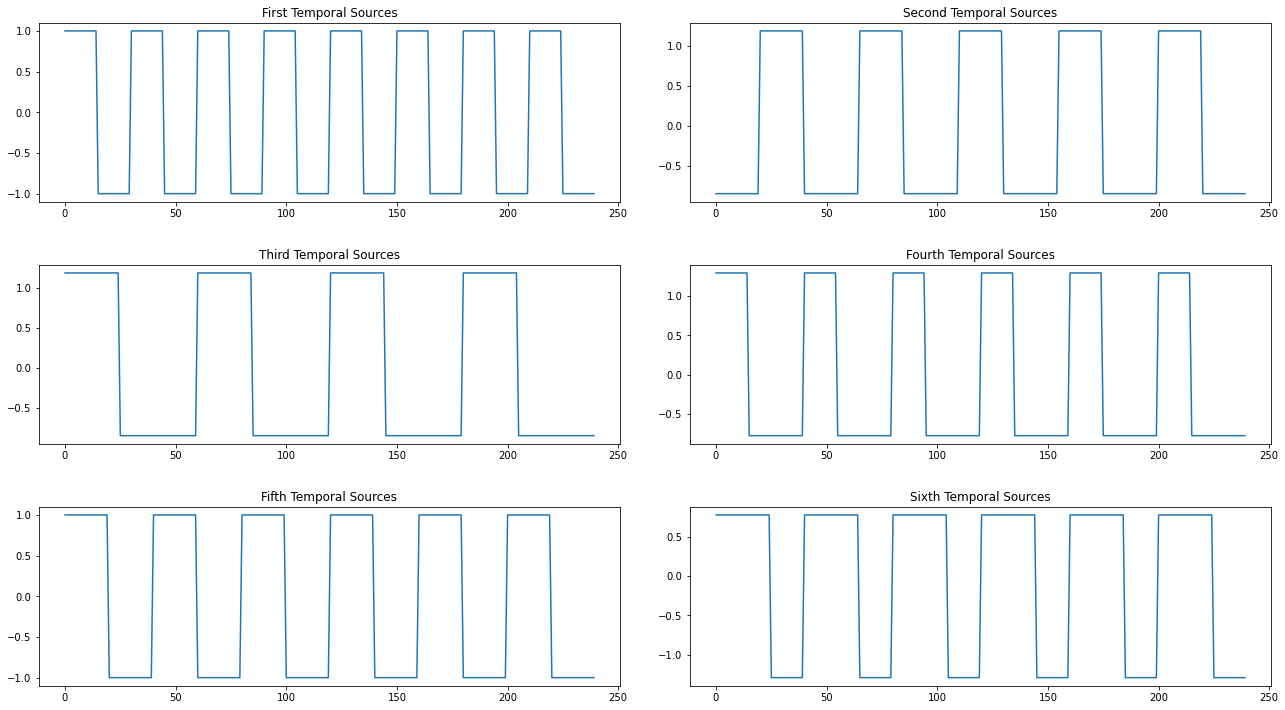

In [4]:
TC = TC.T
fig, axses = plt.subplots(3, 2)
fig.set_size_inches(18.5, 10.5)
axses[0,0].plot(range(0,240), TC[0])
axses[0,0].set_title("First Temporal Sources")
axses[0,1].plot(range(0,240), TC[1])
axses[0,1].set_title("Second Temporal Sources")
axses[1,0].plot(range(0,240), TC[2])
axses[1,0].set_title("Third Temporal Sources")
axses[1,1].plot(range(0,240), TC[3])
axses[1,1].set_title("Fourth Temporal Sources")
axses[2,0].plot(range(0,240), TC[4])
axses[2,0].set_title("Fifth Temporal Sources")
axses[2,1].plot(range(0,240), TC[5])
axses[2,1].set_title("Sixth Temporal Sources")
plt.tight_layout(pad = 3)
# fig.savefig(os.path.join(plot_dir, "TC.png"), dpi=200)
plt.show()

## Question 1.2

/home/trungdc/anaconda3/envs/mast30024asm2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


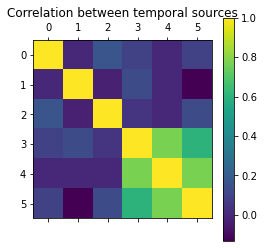

In [8]:
plot_CM(TC, "TC_CM", "Correlation between temporal sources")

## Question 1.3

In [38]:
def generateSM():
    firstSM = np.zeros((21,21))
    firstSM[2:6, 2:6] = 1
    secondSM = np.zeros((21,21))
    secondSM[2:6,15:19] = 1
    thirdSM = np.zeros((21,21))
    thirdSM[8:13, 2:6] = 1
    fourthSM = np.zeros((21,21))
    fourthSM[8:13, 15:19] = 1
    fifthSM = np.zeros((21,21))
    fifthSM[15:19,2:6] = 1
    sixthSM = np.zeros((21,21))
    sixthSM[15:19, 15:19] = 1
    return [firstSM, secondSM, thirdSM, fourthSM, fifthSM, sixthSM]
tmpSM = generateSM()
SM = np.array([np.reshape(matrix, 441) for matrix in tmpSM])
print(f"Shape of SM: {SM.shape}")

Shape of SM: (6, 441)


/home/trungdc/anaconda3/envs/mast30024asm2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


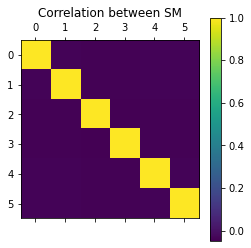

In [10]:
plot_CM(SM.T, "SM_CM", "Correlation between SM")

## Question 1.4

In [35]:
T_t= np.random.normal(0, np.sqrt(0.015) ,(240,6))
T_s = np.random.normal(0, np.sqrt(0.25), (6,441))
print(f"Shape of T_t: {T_t.shape}")
print(f"Shape of T_s: {T_s.shape}")
# export_pickle(T_s, "spacial_noise")
# export_pickle(T_t, "temporal_noise")

Shape of T_t: (240, 6)
Shape of T_s: (6, 441)


In [24]:
# Checking whether noises satisfying 1.96std criteria
T_s = import_pickle("spacial_noise")
T_t = import_pickle("temporal_noise")
newT_s = np.reshape(T_s, T_s.shape[0]* T_s.shape[1])
print(f"Percentage of value outside range for spacial noises: \
    {(len(newT_s[newT_s > 2*np.sqrt(0.25)]) + len(newT_s[newT_s < -2*np.sqrt(0.25)])) / (441*6)*100}")
print(f"Mean of spacial noises: {newT_s.mean()}")
newT_t = np.reshape(T_t, T_t.shape[0]* T_t.shape[1])
print(f"Percentage of value outside range for temporal noises: \
    {(len(newT_t[newT_t > 2*np.sqrt(0.015)]) + len(newT_t[newT_t < -2*np.sqrt(0.015)])) / (240*6)*100}")
print(f"Mean of temporal noises: {newT_t.mean()}")

Percentage of value outside range for spacial noises:     3.8548752834467117
Mean of spacial noises: -0.009947798110354329
Percentage of value outside range for temporal noises:     4.722222222222222
Mean of temporal noises: -0.0009244047990367235


In [18]:
T_s_T_t = np.matmul(T_t, T_s)
T_s_T_t.shape

(240, 441)

/home/trungdc/anaconda3/envs/mast30024asm2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


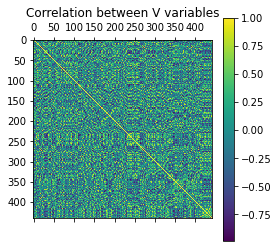

In [20]:
plot_CM(T_s_T_t, "", "Correlation between V variables")

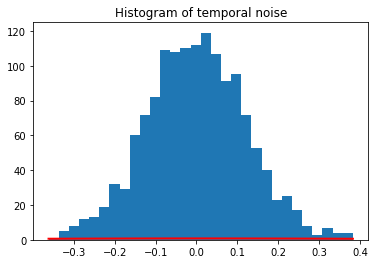

In [11]:
count, bins, ignored = plt.hist(np.reshape(T_t, T_t.shape[0]* T_t.shape[1]), 30)
plt.plot(bins, 1/(np.sqrt(0.25) * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 0)**2 / (2 * np.sqrt(0.25)**2) ),
         linewidth=2, color='r')
plt.title("Histogram of temporal noise")
plt.show()

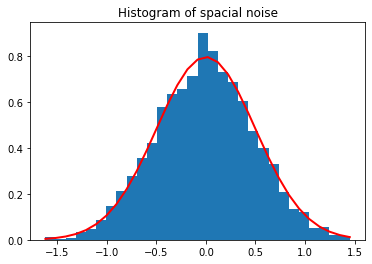

In [12]:
ount, bins, ignored = plt.hist(np.reshape(T_s, T_s.shape[0]* T_s.shape[1]), 30, density=True)
plt.plot(bins, 1/(np.sqrt(0.25) * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 0)**2 / (2 * np.sqrt(0.25)**2) ),
         linewidth=2, color='r')
plt.title("Histogram of spacial noise")
plt.show()

/home/trungdc/anaconda3/envs/mast30024asm2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


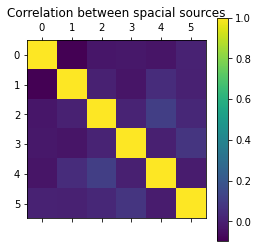

In [16]:
plot_CM(T_s.T, "SM_CM", "Correlation between spacial sources")

/home/trungdc/anaconda3/envs/mast30024asm2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


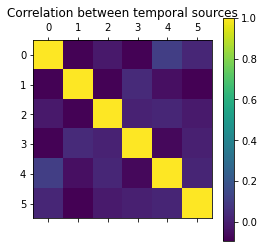

In [17]:
plot_CM(T_t, "SM_CM", "Correlation between temporal sources")

# Question 1.5

In [43]:
X = np.matmul( np.add(TC.T, T_t), np.add(SM, T_s))

print(X.shape)

(240, 441)


In [47]:
vars = []
for var in X:
    vars.append(var.var())

Text(0.5, 1.0, 'Distribution of variance of 441 variables')

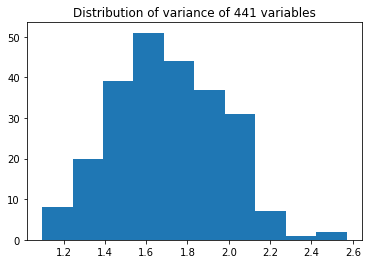

In [48]:
plt.hist(vars)
plt.title("Distribution of variance of 441 variables")

In [53]:
newX = []
for var in X:
    mean = var.mean()
    std = var.std()
    var = (var -mean)/std
    newX.append(var)
newX = np.array(newX)
newX.shape

(240, 441)

In [56]:
X = newX
export_pickle(X, "X")

(240, 441)


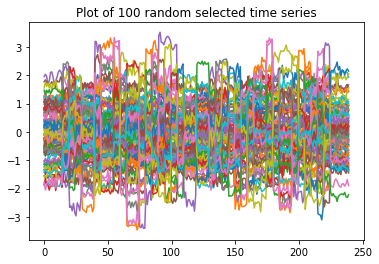

In [60]:
index = np.random.randint(0,441, 100)
X = import_pickle("X")
print(X.shape)
plt.plot(X.T[index].T)
plt.title("Plot of 100 random selected time series")
plt.show()
plt.close()

In [59]:
def checkProduct():
    spacial_noise = import_pickle("spacial_noise")
    temporal_noise = import_pickle("temporal_noise")
    TC = import_pickle("TC")
    SM = import_pickle("SM")
    try:
        np.matmul(TC, spacial_noise)
    except ValueError:
        print("TC and spacial_noise can not be multiplied")
    else:
        print("TC and spacial_noise can be multiplied")

    try:
        np.matmul(SM, temporal_noise)
    except ValueError:
        print("SM and temporal_noise can not be multiplied")
    else:
        print("SM and temporal_noise can be multiplied")

checkProduct()

TC and spacial_noise can be multiplied
SM and temporal_noise can not be multiplied
